# Drawing an elephant with four complex parameters

See Mayer et al. (2010) for more details (https://doi.org/10.1119/1.3254017)

Initiate code:

In [6]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt

Define all parameters:

In [7]:
# 4 Elephant parameters (outline)
p1 = 50 - 30j
p2 = 18 + 8j
p3 = 12 - 10j
p4 = -14 - 60j
# 5th parameter (eyes + trunk)
p5 = 40 + 20j

Calculate plotting coordinates:

In [8]:
# cylindrical coordinate range (full circle)
t = np.linspace(0, 2 * np.pi, 361)
# fourier series parameters
k = np.arange(0, 6)
Ax = np.array([0, 0, 0, p3.real, 0, p4.real])
Bx = np.array([0, p1.real, p2.real, 0, 0, 0])
Ay = np.array([0, p4.imag, 0, 0, 0, 0])
By = np.array([0, p1.imag, p2.imag, p3.imag, 0, 0])
# fourier series
x_outline = np.sum(Ax * np.cos(np.outer(t, k)) + Bx * np.sin(np.outer(t, k)), axis = 1)
y_outline = np.sum(Ay * np.cos(np.outer(t, k)) + By * np.sin(np.outer(t, k)), axis = 1)
# eye
x_eye = y_eye = p5.imag


Now plot our elephant...

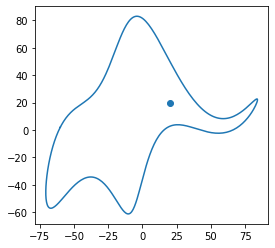

In [9]:
fig, ax = plt.subplots()
ax.plot(y_outline, -x_outline)
ax.scatter(x_eye, y_eye)
ax.set_aspect('equal', 'box')

...and make his trunk wiggle!

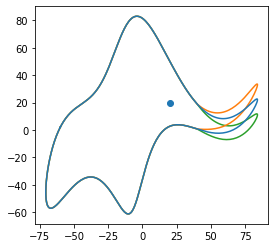

In [ ]:
# trunk coordinates at various amounts of 'wiggle'
x_outline_trunk_down_2 = x_outline.copy()
x_outline_trunk_up = x_outline.copy()
x_outline_trunk_down_2[y_outline > p5.real] = (
    x_outline_trunk_down_2[y_outline > p5.real] 
    - 0.25 * (y_outline[y_outline > p5.real] - p5.real)
    )
x_outline_trunk_up[y_outline > p5.real] = (
    x_outline_trunk_up[y_outline > p5.real] 
    + 0.25 * (y_outline[y_outline > p5.real] - p5.real)
    )
# plot wiggly trunk
fig2, ax2 = plt.subplots()
ax2.scatter(x_eye, y_eye)
ax2.set_aspect('equal', 'box')
ax2.plot(y_outline, -x_outline)
ax2.plot(y_outline, -x_outline_trunk_down_2, zorder = -1)
ax2.plot(y_outline, -x_outline_trunk_up, zorder = -2)
